#### 可以比较直方图均衡化和Homomorphic Filtering的区别

In [1]:
import cv2
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./HF.jpg', 0)
img

array([[15, 15, 15, ...,  5,  5,  5],
       [15, 15, 15, ...,  5,  5,  5],
       [15, 15, 15, ...,  5,  5,  5],
       ...,
       [ 6,  6,  7, ..., 11, 10, 10],
       [ 6,  6,  6, ..., 11, 10, 10],
       [ 6,  6,  7, ..., 12, 10,  9]], dtype=uint8)

In [3]:
log_img = np.log(img.astype('float') + 1.0)

In [9]:
sigma = 1

In [10]:
rows, cols = img.shape
M, N = np.meshgrid(np.arange(cols), np.arange(rows))
centerX = int(cols / 2)
centerY = int(rows / 2)
gaussian = np.exp(-((M - centerX) ** 2 + (N - centerY) ** 2) / (2 * sigma ** 2))
filtered_log = gaussian * fftpack.fft2(log_img)

In [11]:
filtered = np.real(fftpack.ifft2(np.exp(fftpack.ifftshift(filtered_log))))

In [12]:
normalized = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

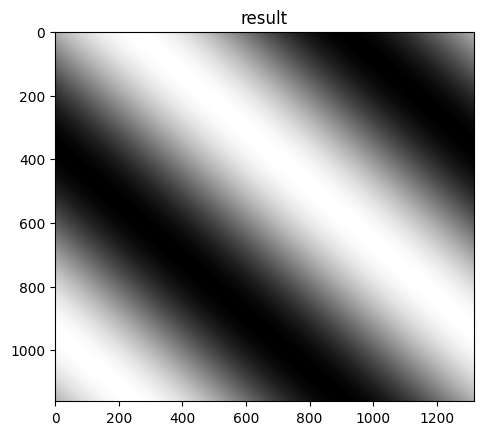

In [13]:
plt.imshow(normalized, cmap='gray')
plt.title('result')
plt.show()